## Intro to Waves

- $ \lambda = \frac{v}{f} $
- where:
    - $ \lambda $ is the wavelength
    - $ v $ is the wave speed
    - $ f $ is the frequency
    
- harmonics
    - $ \lambda_{n} = \frac{2L}{n} $

In [1]:
%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
from matplotlib import animation, rc
from IPython.display import HTML

%config InlineBackend.figure_format = 'retina'

In [ ]:
def animate_wave(duration_sec=5):
    figure, ax =  plt.subplots()
    figure.set_size_inches(12, 4)
    
    interval = 25
    
    t_0 = 0
    
    def draw_wave(ax, xs, ys):
        return ax.plot(xs, ys)
    
    def setup_axes(ax):
        ax.clear()
        ax.set_title('Basic Wave')
        ax.grid(True)
        ax.set_ylabel('Amplitude')
        ax.set_xlabel('Time')
        ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
        
    def init():
        setup_axes(ax)
        # times (x-axis)
        xs = np.arange(0 - 5, 10 - 5, 0.1)
        # amplitudes
        ys = np.sin(xs)
        
        return draw_wave(ax, xs, ys)
    
    def animate(i):
        setup_axes(ax)
        
        t = t_0 + (i * interval / 1000)
        # times (x-axis)
        xs = np.arange(t - 5, t + 10 - 5, 0.1)
        # amplitudes
        ys = np.sin(xs)
        
        return draw_wave(ax, xs/np.pi, ys)
        
    anim = animation.FuncAnimation(figure, animate, init_func=init,
                                   frames=duration_sec * (int)(1e3 / interval) + 1,
                                   interval=interval,
                                   blit=True)
    rc('animation', html='html5')
    HTML(anim.to_html5_video())
    return anim

animate_wave(6)

In [ ]:
def animate_wave(duration_sec=5):
    figure, ax =  plt.subplots()
    figure.set_size_inches(12, 4)
    
    interval = 25
    
    t_0 = 0
    
    A = 0.5
    angular_frequency = 2
    wavelength = 0.5
    
    xs = np.arange(0, 2.01, 0.01)
    
    def draw_wave(ax, xs, ys):
        return ax.plot(xs, ys)
    
    def setup_axes(ax):
        ax.clear()
        ax.set_title('Standing Wave')
        ax.grid(True)
        ax.set_ylabel('Amplitude')
        ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
        ax.set_ylim(-1, 1)
        
    def init():
        setup_axes(ax)
        ys = 2 * 1 * np.sin((2 * np.pi * xs) / wavelength) * np.cos(angular_frequency * t_0)
        return draw_wave(ax, xs, ys)
    
    def animate(i):
        setup_axes(ax)
        t = t_0 + (i * interval / 1000)
        ys = 2 * A * np.sin((2 * np.pi * xs) / wavelength) * np.cos(angular_frequency * t)
        return draw_wave(ax, xs, ys)
        
    anim = animation.FuncAnimation(figure, animate, init_func=init,
                                   frames=duration_sec * (int)(1e3 / interval) + 1,
                                   interval=interval,
                                   blit=True)
    rc('animation', html='html5')
    HTML(anim.to_html5_video())
    return anim

animate_wave(6)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def animate_wave(duration_sec=5):
    figure =  plt.figure()
    ax = Axes3D(figure)
    
    interval = 50
    
    t_0 = 0
    
    def setup_axes(ax):
        ax.clear()
        ax.set_title('3D Wave')
        ax.grid(True)
        ax.set_zlabel('Amplitude')
        ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
        ax.yaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
        ax.set_zlim(-1, 4)
        
    def init():
        setup_axes(ax)
        X = np.arange(-5, 5, 0.25)
        Y = np.arange(-5, 5, 0.25)
        X, Y = np.meshgrid(X, Y)
        R = np.sqrt(X**2 + Y**2)
        Z = np.sin(R)
        return [ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis)]
    
    def animate(i):
        setup_axes(ax)
        t = t_0 + (i * interval / 1000)
        X = np.arange(-7 + t, 7 + t, 0.25)
        Y = np.arange(-7 + t, 7 + t, 0.25)
        X, Y = np.meshgrid(X, Y)
        R = np.sqrt(X**2 + Y**2)
        Z = np.sin(R)
        return [ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis)]
        
    anim = animation.FuncAnimation(figure, animate, init_func=init,
                                   frames=duration_sec * (int)(1e3 / interval) + 1,
                                   interval=interval,
                                   blit=True)
    rc('animation', html='html5')
    HTML(anim.to_html5_video())
    return anim

animate_wave(6)

In [ ]:
from datetime import datetime
from matplotlib import pyplot
from matplotlib.animation import FuncAnimation
from random import randrange

x_data, y_data = [], []

figure = pyplot.figure()
line, = pyplot.plot_date(x_data, y_data, '-')

def update(frame):
    x_data.append(datetime.now())
    y_data.append(randrange(0, 100))
    line.set_data(x_data, y_data)
    figure.gca().relim()
    figure.gca().autoscale_view()
    return line,

animation = FuncAnimation(figure, update, interval=100)

rc('animation', html='html5')
HTML(animation.to_html5_video())

pyplot.show()

animation

[0.023]: initializing figure...
[0.060]: running computations...
[0.114]: drawing frames...


Traceback (most recent call last):
  File "/home/forrest2/Workspace/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/home/forrest2/Workspace/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 999, in _start
    self._init_draw()
  File "/home/forrest2/Workspace/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 1535, in _init_draw
    for artist in f:
TypeError: 'AxesImage' object is not iterable


[3.978]: piping frames to ffmpeg...
[17.368]: closing pipe...
[17.539]: done


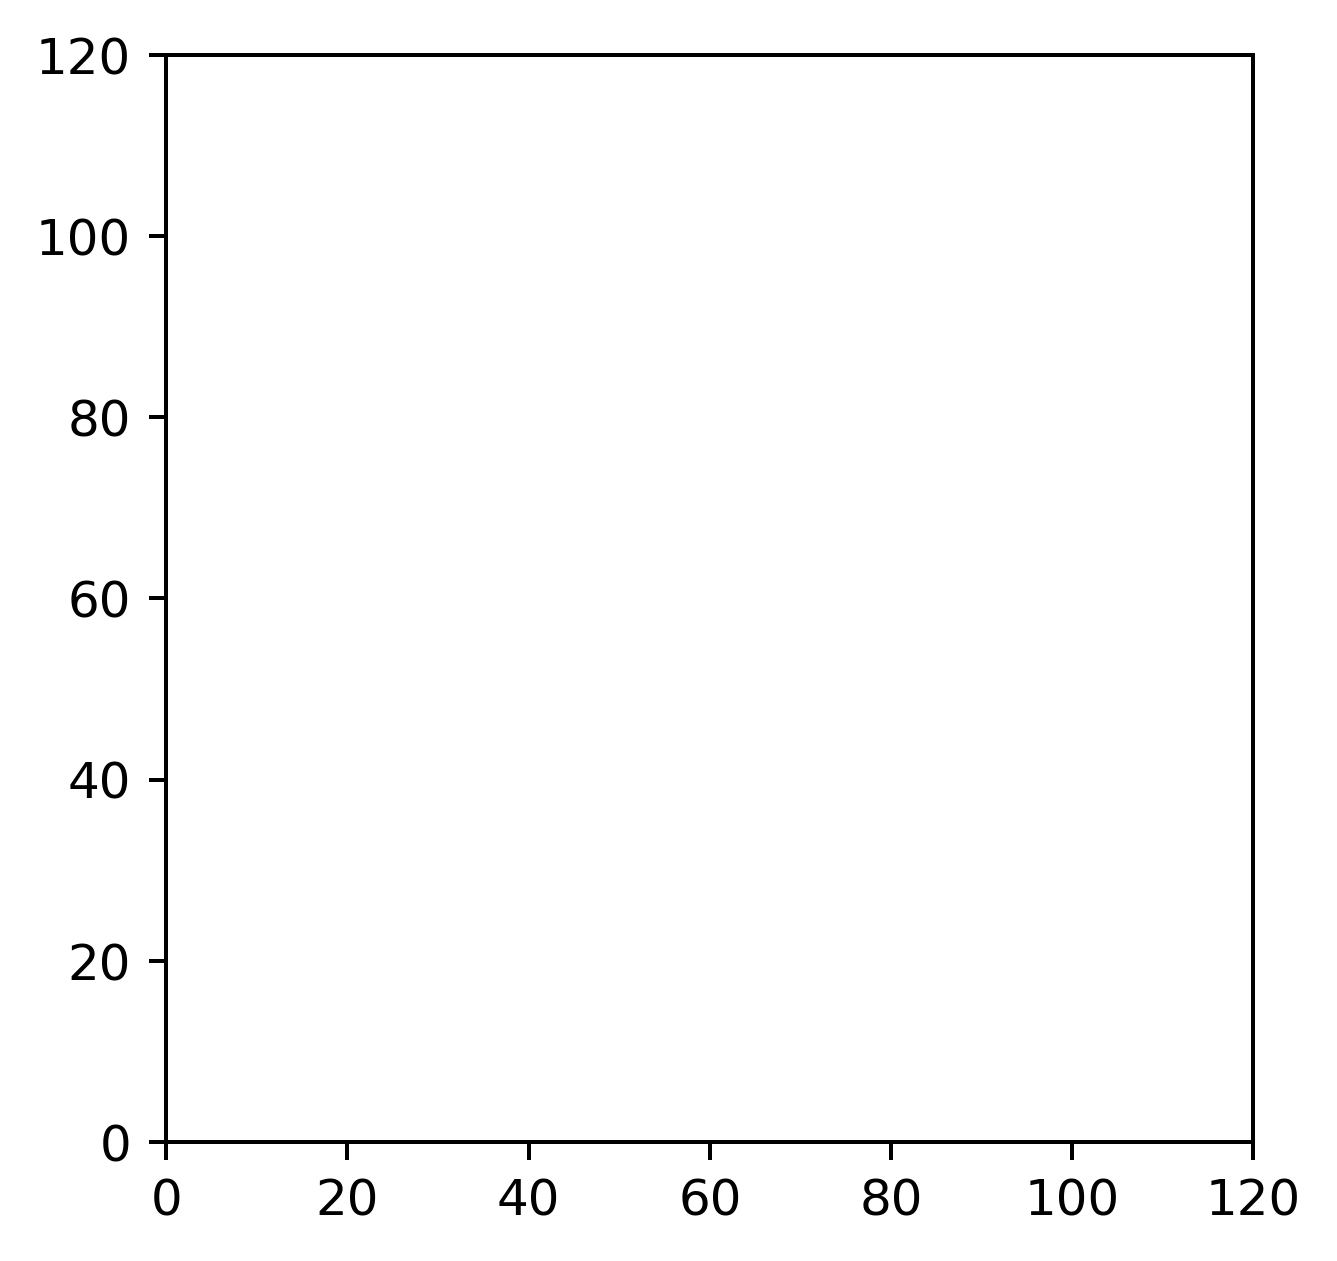

In [119]:
fps = 20

def f(x, y):
    return np.sin(x) + np.cos(y)

def update_field(i):
    t = (i * (1000/fps) / 1000)
    dx = -np.sin(t)
    dy = -dx
    x = np.linspace(0 + dx, dx + 2 * np.pi, 120)
    y = np.linspace(0 + dy, dy + 2 * np.pi, 120).reshape(-1, 1)
    return f(x, y)

def animate_field(len_sec=5):
    fig, ax =  plt.subplots()
    fig.set_size_inches(4, 4)
    fig.set_dpi(180)
    ax.set_xlim(0, 120)
    ax.set_ylim(0, 120)
    
    def update(i):
        ax.set_xlim(0, 120)
        ax.set_ylim(0, 120)

    mp_render(fig, ax, update_field, len_sec=len_sec, fps=fps, update=update)

    return HTML('<video width="500px" controls src="movie.mp4" />')

animate_field(10)

[0.021]: initializing figure...
[0.051]: running computations...
[0.073]: drawing frames...


Traceback (most recent call last):
  File "/home/forrest2/Workspace/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/home/forrest2/Workspace/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 999, in _start
    self._init_draw()
  File "/home/forrest2/Workspace/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 1535, in _init_draw
    for artist in f:
TypeError: 'Line2D' object is not iterable


[0.723]: piping frames to ffmpeg...
[30.745]: closing pipe...
[30.761]: done


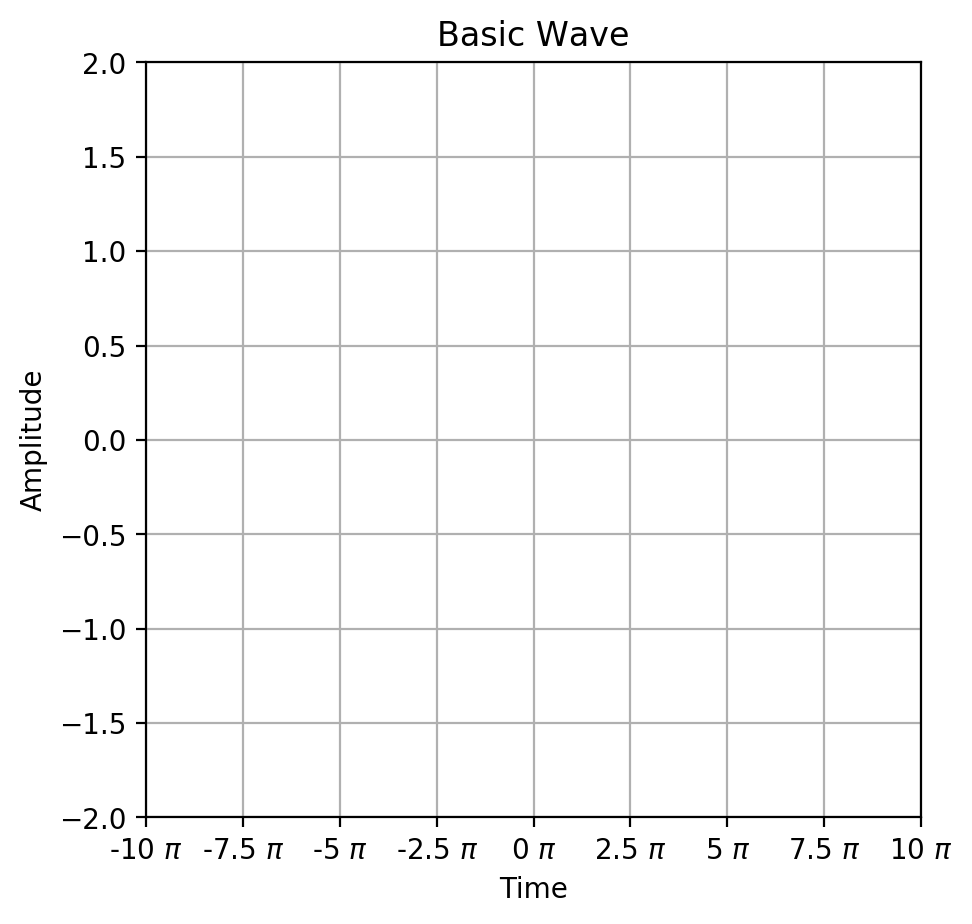

In [98]:
fps = 10

def update_wave(i):
    t = (i * (1000/fps) / 1000)
    # times (x-axis)
    xs = np.arange(t - 5, t + 10 - 5, 0.1)
    # amplitudes
    ys = np.sin(xs)
    dx = 0
    dy = 0
    x = np.linspace(0 + dx, dx + 2 * np.pi, 100)
    y = np.linspace(0 + dy, dy + 2 * np.pi, 100).reshape(-1, 1)
    return xs,ys
    
def animate_wave(duration_sec=5):
    figure, ax =  plt.subplots()
    figure.set_size_inches(5, 5)
    figure.set_dpi(100)
    
    def draw_wave(res):
        xs,ys = res
        return ax.plot(xs, ys, color='b')[0]
        
    def setup_axes(i):
        ax.clear()
        ax.set_title('Basic Wave')
        ax.grid(True)
        ax.set_ylabel('Amplitude')
        ax.set_xlabel('Time')
        ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
        ax.set_xlim(-10, 10)
        ax.set_ylim(-2, 2)
        
    mp_render(figure, ax, update_wave, draw=draw_wave, fps=45, update=setup_axes)

animate_wave(6)

In [ ]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import mpl_toolkits.mplot3d.axes3d as p3
from IPython.display import HTML

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1,projection="3d")
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 4)

t = np.linspace(0, 80, 300)
x = np.cos(2 * np.pi * t / 10.)
y = np.sin(2 * np.pi * t / 10.)
z = 10 * t

ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_xlim(-1, 1)
ax1.set_ylim(-1, 1)
ax1.set_zlim(0, 800)

ax2.set_xlabel('y')
ax2.set_ylabel('z')
ax2.set_xlim(-1, 1)
ax2.set_ylim(0, 800)

ax3.set_xlabel('x')
ax3.set_ylabel('z')
ax3.set_xlim(-1, 1)
ax3.set_ylim(0, 800)

lines = []
for i in range(len(t)):
    head = i - 1
    head_slice = (t > t[i] - 1.0) & (t < t[i])
    #print(x[head],y[head],z[head])
    line1,  = ax1.plot(x[:i], y[:i], z[:i],
                       color='black')
    line1a, = ax1.plot(x[head_slice], y[head_slice], z[head_slice],
                       color='red', linewidth=2)
    line1e, = ax1.plot([x[head]], [y[head]], [z[head]],
                       color='red', marker='o', markeredgecolor='r')
    line2,  = ax2.plot(y[:i], z[:i],
                       color='black')
    line2a, = ax2.plot(y[head_slice], z[head_slice],
                       color='red', linewidth=2)
    line2e, = ax2.plot(y[head], z[head],
                       color='red', marker='o', markeredgecolor='r')
    line3,  = ax3.plot(x[:i], z[:i],
                       color='black')
    line3a, = ax3.plot(x[head_slice], z[head_slice],
                       color='red', linewidth=2)
    line3e, = ax3.plot(x[head], z[head],
                       color='red', marker='o', markeredgecolor='r')
    lines.append([line1,line1a,line1e,line2,line2a,line2e,line3,line3a,line3e])
    
plt.tight_layout()
ani = animation.ArtistAnimation(fig, lines, interval=50, blit=True)

fn = 'line_animation_3d_with_two_2d_artistanimation'
ani.save('%s.mp4'%(fn), writer='ffmpeg',fps=1000/50)
# ani.save('%s.gif'%(fn), writer='imagemagick',fps=1000/50)

# cmd = f"ffmpeg -i {fn}.mp4 -vf fps=30 -r 30 jupiter.gif"
# subprocess.check_output(cmd)

plt.rcParams['animation.html'] = 'html5'
ani

<video controls src="movie.mp4" />